# análisis datos banco  
proyecto ejercicio 
datos tomados de : https://www.youtube.com/watch?v=bGnD1Ki7j-g&list=WL&index=168&t=716s&ab_channel=CodificandoBits

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para
determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# carga de datos

In [1067]:
import pandas as pd

ruta_archivo=r"dataset_banco.csv"
datos_banco=pd.read_csv(ruta_archivo)
print(datos_banco.head(3),'\n')
print(datos_banco.tail(3),'\n')

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may     261.0         1   -1.0         0  unknown  no  
1  unknown    5   may     151.0         1   -1.0         0  unknown  no  
2  unknown    5   may      76.0         1   -1.0         0  unknown  no   

       age           job  marital  education default  balance housing loan  \
45212   72       retired  married  secondary      no   5715.0      no   no   
45213   57   blue-collar  married  secondary      no    668.0      no   no   
45214   37  entrepreneur  married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45212   cel

### los datos se componen de las siguientes columnas

In [1068]:
print(datos_banco.columns,'\n')
print(datos_banco.info())

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64

### en el conjunto de datos faltan los siguientes datos

In [1069]:
print("faltan los siguientes datos: \n",datos_banco.isnull().sum())

faltan los siguientes datos: 
 age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64


### los datos se describen como

In [1070]:
numero_filas,numero_columnas=datos_banco.shape
print("\nNumero de filas ",numero_filas," numero de columnas ",numero_columnas,"\n")
print(datos_banco.dtypes,'\n')
print(datos_banco.describe())


Numero de filas  45215  numero de columnas  17 

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
y             object
dtype: object 

                age        balance           day      duration      campaign  \
count  45215.000000   45213.000000  45215.000000  45214.000000  45215.000000   
mean      41.004711    1374.159866     15.805839    258.074357      2.763729   
std       12.036647    3924.255525      8.322473    257.605175      3.097910   
min       18.000000   -8019.000000      1.000000  -1389.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.0000

# 2. limpieza de datos

2.1 para este caso hay muy pocos datos faltantes se procederá a eliminarlos

In [1071]:
datos_banco.dropna(inplace=True)
datos_banco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


identificar las columnas irrelevantes

2.2 si hay un 1 esa columna se omite para el análisis

In [1072]:
columnas_object_nombres=datos_banco.select_dtypes(include=['object']).columns.to_list()
for columna in columnas_object_nombres:
    print(f'columna {columna} : {datos_banco[columna].nunique()} sub niveles') #si aca hay un 1 esa columna se omite para el análisis


columna job : 18 sub niveles
columna marital : 6 sub niveles
columna education : 10 sub niveles
columna default : 2 sub niveles
columna housing : 2 sub niveles
columna loan : 6 sub niveles
columna contact : 5 sub niveles
columna month : 12 sub niveles
columna poutcome : 6 sub niveles
columna y : 2 sub niveles


2.3 eliminación de filas repetidas

In [1073]:
print("el tamaño del conjunto de datos es : ",datos_banco.shape)
datos_banco.drop_duplicates(inplace=True)
print("el tamaño del conjunto de datos después es : ",datos_banco.shape)

el tamaño del conjunto de datos es :  (45207, 17)
el tamaño del conjunto de datos después es :  (45203, 17)


2.4 identificar los valores extremos y eliminarlos, para algunas variables se hace de forma diferente

In [1074]:
import numpy as np

def  remover_de_atípicos(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IRQ=Q3-Q1
    limite_inferior=Q1-1.5*IRQ
    limite_superior=Q3+1.5*IRQ
    return df[(df[column]>=limite_inferior)&(df[column]<=limite_superior)]

columnas_numéricas_nombres=datos_banco.select_dtypes(exclude=['object']).columns.to_list()

print("el tamaño del conjunto de datos es : ",datos_banco.shape)
print("se van a remover datos atípicos de las columnas numéricas")
# for column in columnas_numéricas_nombres:    #ojo , en este caso esto no se puede hacer , el valance no se modifica
#     datos_banco = remover_de_atípicos(datos_banco, column)
#     print(f"Valores atípicos eliminados de {column}")
# print("el tamaño del conjunto de datos es : ",datos_banco.shape)
datos_banco=remover_de_atípicos(datos_banco,'age')

datos_banco=datos_banco[datos_banco['duration']>0]#filas llamadas negativas

datos_banco=datos_banco[datos_banco['previous']<=100]#mas de 100 llamadas

print("el tamaño del conjunto de datos es : ",datos_banco.shape)
print('\n',datos_banco.describe())

el tamaño del conjunto de datos es :  (45203, 17)
se van a remover datos atípicos de las columnas numéricas
el tamaño del conjunto de datos es :  (44703, 17)

                 age        balance           day      duration      campaign  \
count  44703.000000   44703.000000  44703.000000  44703.000000  44703.000000   
mean      40.546362    1357.192135     15.813659    257.320985      2.770150   
std        9.978929    3885.402001      8.324871    257.245655      3.107104   
min       18.000000   -8019.000000      1.000000      1.000000      1.000000   
25%       33.000000      71.000000      8.000000    103.000000      1.000000   
50%       39.000000     442.000000     16.000000    179.000000      2.000000   
75%       48.000000    1408.000000     21.000000    318.000000      3.000000   
max       70.000000  527532.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  44703.000000  44703.000000  
mean      39.979845      0.567188  
std      10

2.5 identificara los errores tipográficos

In [1075]:
for columnas in columnas_object_nombres:
    variabilidad_columnas=datos_banco[columnas].value_counts()
    print(variabilidad_columnas,'\n')

job
blue-collar       9724
management        9438
technician        7589
admin.            5162
services          4151
retired           1829
self-employed     1571
entrepreneur      1484
unemployed        1303
housemaid         1224
student            937
unknown            281
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64 

marital
married     26835
single      12769
divorced     5085
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64 

education
secondary    23050
tertiary     13210
primary       6628
unknown       1804
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64 

default
no     43889
yes      814
Name: count, dtype: int64 

housing
yes    25099
no     19604
Name: count, dtype: int64 

loan
no     37458
yes     7235
No         5
YES        2
N

para este caso si hay errores de tipografía en las columnas 'job', 'marital' ,'education' ,'loan', 'contact' y 'poutcome'

In [1076]:
#para el caso de job unificar admin. con administrative
print(datos_banco['job'].value_counts(),'\n')

print(f"los datos de la variable {columnas_object_nombres[0]} son : ")
print(datos_banco['job'].unique())#ver los nombres exactos
datos_banco['job'] = datos_banco['job'].str.lower()
datos_banco['job']=datos_banco['job'].str.replace('admin.','administrative', regex=False)
print("los datos corregidos quedaron como : ")
print(datos_banco['job'].unique())

print(datos_banco['job'].value_counts(),'\n')


job
blue-collar       9724
management        9438
technician        7589
admin.            5162
services          4151
retired           1829
self-employed     1571
entrepreneur      1484
unemployed        1303
housemaid         1224
student            937
unknown            281
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64 

los datos de la variable job son : 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'Management' 'retired' 'admin.' 'services' 'self-employed' 'MANAGEMENT'
 'Self-employed' 'unemployed' 'housemaid' 'student' 'Services' 'Retired'
 'administrative']
los datos corregidos quedaron como : 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
job
blue-collar       9724
management        9442
technician        7589
administrative    

In [1077]:
# para el caso de marital unificar div y divorced
print(datos_banco['marital'].value_counts(),'\n')
print(f"los datos de la variable {columnas_object_nombres[1]} son : ")
print(datos_banco['marital'].unique())#ver los nombres exactos
datos_banco['marital'] = datos_banco['marital'].str.lower()
datos_banco['marital']=datos_banco['marital'].str.replace('div.','divorced', regex=False)
print("los datos corregidos quedaron como : ")
print(datos_banco['marital'].unique())

print(datos_banco['marital'].value_counts(),'\n')

marital
married     26835
single      12769
divorced     5085
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64 

los datos de la variable marital son : 
['married' 'single' 'div.' 'divorced' 'DIVORCED' 'Single']
los datos corregidos quedaron como : 
['married' 'single' 'divorced']
marital
married     26835
single      12773
divorced     5095
Name: count, dtype: int64 



In [1078]:
#para el caso de education: unificar sec. y secondary, unk y unknown
print(datos_banco['education'].value_counts(),'\n')
print(f"los datos de la variable {columnas_object_nombres[2]} son : ")
print(datos_banco['education'].unique())#ver los nombres exactos
datos_banco['education'] = datos_banco['education'].str.lower()
datos_banco['education']=datos_banco['education'].str.replace('sec.','secondary', regex=False)
datos_banco.loc[datos_banco['education']=='unk','education']='unknown'
print("los datos corregidos quedaron como : ")
print(datos_banco['education'].unique())

print(datos_banco['education'].value_counts(),'\n')

education
secondary    23050
tertiary     13210
primary       6628
unknown       1804
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64 

los datos de la variable education son : 
['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'sec.' 'Tertiary' 'UNK']
los datos corregidos quedaron como : 
['tertiary' 'secondary' 'unknown' 'primary']
education
secondary    23056
tertiary     13211
primary       6630
unknown       1806
Name: count, dtype: int64 



In [1079]:
# y para el caso de poutcome: unificar unk y unknown
print(datos_banco['poutcome'].value_counts(),'\n')
print(f"los datos de la variable {columnas_object_nombres[8]} son : ")
print(datos_banco['poutcome'].unique())#ver los nombres exactos
datos_banco['poutcome'] = datos_banco['poutcome'].str.lower()
datos_banco.loc[datos_banco['poutcome']=='unk','poutcome']='unknown'
print("los datos corregidos quedaron como : ")
print(datos_banco['poutcome'].unique())

print(datos_banco['poutcome'].value_counts(),'\n')

poutcome
unknown    36634
failure     4833
other       1802
success     1428
UNK            4
Success        2
Name: count, dtype: int64 

los datos de la variable poutcome son : 
['unknown' 'UNK' 'failure' 'other' 'success' 'Success']
los datos corregidos quedaron como : 
['unknown' 'failure' 'other' 'success']
poutcome
unknown    36638
failure     4833
other       1802
success     1430
Name: count, dtype: int64 



In [1080]:
# para el caso de contact: unificar telephone y phone
print(datos_banco['contact'].value_counts(),'\n')
print(f"los datos de la variable {columnas_object_nombres[6]} son : ")
print(datos_banco['contact'].unique())
datos_banco['contact'] = datos_banco['contact'].str.lower()
datos_banco.loc[datos_banco['contact']=='phone','contact'] = 'telephone'
datos_banco.loc[datos_banco['contact']=='mobile','contact'] = 'cellular'
print(datos_banco['contact'].unique())

print(datos_banco['contact'].value_counts(),'\n')

contact
cellular     29007
unknown      13011
telephone     2679
phone            3
mobile           3
Name: count, dtype: int64 

los datos de la variable contact son : 
['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']
contact
cellular     29010
unknown      13011
telephone     2682
Name: count, dtype: int64 



In [1081]:
# para el caso de loan pasar todo a minúscula
datos_banco['loan'] = datos_banco['loan'].str.lower()

In [1082]:
print(datos_banco.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44703 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44703 non-null  int64  
 1   job        44703 non-null  object 
 2   marital    44703 non-null  object 
 3   education  44703 non-null  object 
 4   default    44703 non-null  object 
 5   balance    44703 non-null  float64
 6   housing    44703 non-null  object 
 7   loan       44703 non-null  object 
 8   contact    44703 non-null  object 
 9   day        44703 non-null  int64  
 10  month      44703 non-null  object 
 11  duration   44703 non-null  float64
 12  campaign   44703 non-null  int64  
 13  pdays      44703 non-null  float64
 14  previous   44703 non-null  int64  
 15  poutcome   44703 non-null  object 
 16  y          44703 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.1+ MB
None


In [1083]:
for columna in columnas_object_nombres:
    print(datos_banco[columna].value_counts(),'\n')

job
blue-collar       9724
management        9442
technician        7589
administrative    5165
services          4152
retired           1830
self-employed     1572
entrepreneur      1484
unemployed        1303
housemaid         1224
student            937
unknown            281
Name: count, dtype: int64 

marital
married     26835
single      12773
divorced     5095
Name: count, dtype: int64 

education
secondary    23056
tertiary     13211
primary       6630
unknown       1806
Name: count, dtype: int64 

default
no     43889
yes      814
Name: count, dtype: int64 

housing
yes    25099
no     19604
Name: count, dtype: int64 

loan
no     37465
yes     7238
Name: count, dtype: int64 

contact
cellular     29010
unknown      13011
telephone     2682
Name: count, dtype: int64 

month
may    13728
jul     6863
aug     6175
jun     5323
nov     3937
apr     2872
feb     2588
jan     1384
oct      674
sep      521
mar      444
dec      194
Name: count, dtype: int64 

poutcome
unknown    36

# 3. Análisis de datos

recordar que mi variable objetivo es aumentar los 'yes' de la columna 'y'

In [1084]:
#datos_banco.info()
print(datos_banco['y'].value_counts())

y
no     39635
yes     5068
Name: count, dtype: int64


3.1 creación de columnas a partir de las sub categorías

In [1085]:
def agregar_columnas_booleanas(df, columna):
    # Aplicar One-Hot Encoding a la columna especificada
    dummies = pd.get_dummies(df[columna], prefix=columna).astype(np.uint8)
    
    # Agregar las nuevas columnas al DataFrame original
    df = pd.concat([df, dummies], axis=1)
    
    return df

# retiro el mes 
columnas_object_nombres_no_m=[palabra for palabra in columnas_object_nombres if palabra != 'month']

for columna in columnas_object_nombres_no_m:
    datos_banco=agregar_columnas_booleanas(datos_banco,columna)

print(datos_banco.info())


<class 'pandas.core.frame.DataFrame'>
Index: 44703 entries, 0 to 45214
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  44703 non-null  int64  
 1   job                  44703 non-null  object 
 2   marital              44703 non-null  object 
 3   education            44703 non-null  object 
 4   default              44703 non-null  object 
 5   balance              44703 non-null  float64
 6   housing              44703 non-null  object 
 7   loan                 44703 non-null  object 
 8   contact              44703 non-null  object 
 9   day                  44703 non-null  int64  
 10  month                44703 non-null  object 
 11  duration             44703 non-null  float64
 12  campaign             44703 non-null  int64  
 13  pdays                44703 non-null  float64
 14  previous             44703 non-null  int64  
 15  poutcome             44703 non-null  obje

3.2 análisis de correlaciones

In [1086]:
datos_banco_numeric=datos_banco.select_dtypes(include=['float64','int64','int32','uint8'])
correlaciones_=datos_banco_numeric.corr()['y_yes'].sort_values(ascending=False)
print(correlaciones_)

y_yes                  1.000000
duration               0.396362
poutcome_success       0.303881
contact_cellular       0.140453
housing_no             0.131171
previous               0.111434
pdays                  0.102527
job_student            0.080172
marital_single         0.071831
education_tertiary     0.071173
loan_no                0.064659
job_retired            0.039360
job_management         0.038817
balance                0.034935
poutcome_other         0.032898
job_unemployed         0.022766
default_no             0.021785
poutcome_failure       0.010016
job_administrative     0.009809
education_unknown      0.009049
job_self-employed      0.001832
job_unknown            0.000128
contact_telephone     -0.001206
marital_divorced      -0.001248
job_technician        -0.004392
age                   -0.013823
job_housemaid         -0.015031
job_entrepreneur      -0.018212
default_yes           -0.021785
job_services          -0.024725
day                   -0.029551
educatio

con lo anterior podemos ver varias cosas, vemos que lo que le da proporcionalidad moderada (superior a 0.05) a nuestra variable objetivo es 'duration', 'poutcome_success', 'contact_cellular', 'housing_no', 'previous', 'pdays'y 'job_student'

# 4. análisis descriptivo

4.1 vamos a ver la estadística descriptiva de las columnas numéricas

In [1087]:
datos_banco.describe(exclude=['uint8','object'])

,age,balance,day,duration,campaign,pdays,previous
count,44703.000000,44703.000000,44703.000000,44703.000000,44703.000000,44703.000000,44703.000000
mean,40.546362,1357.192135,15.813659,257.320985,2.770150,39.979845,0.567188
std,9.978929,3885.402001,8.324871,257.245655,3.107104,100.170998,1.899869
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1408.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,70.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


4.2 visualicemos las distribuciones de forma gráfica

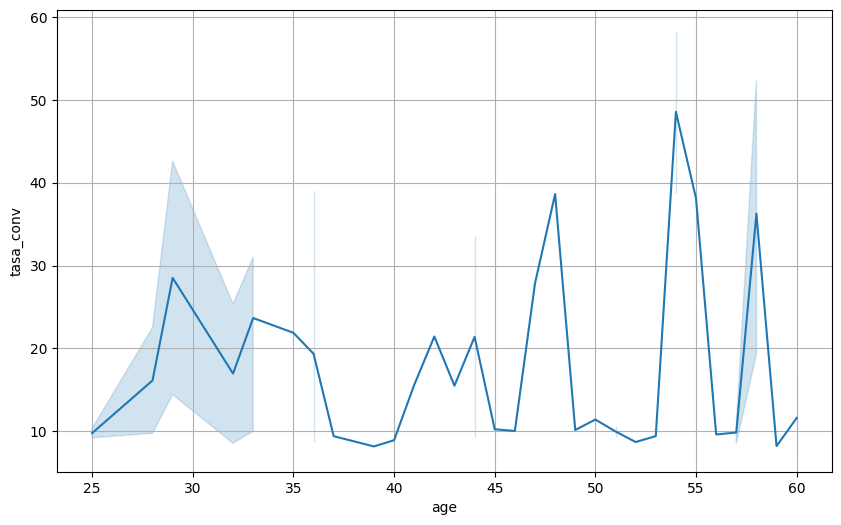

In [1088]:
#veamos primero la age con respecto a la conversion ('y')
import matplotlib.pyplot as plt
import seaborn as sns

grupo_=datos_banco.groupby('age')['y_yes'].mean().mul(100).rename('tasa_conv').reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=datos_banco['age'], y='tasa_conv', data=grupo_)
plt.grid()

de esta gráfica podemos ver que la tasa de conversion con respecto a las edades es baja, correspondiendo a la franja de mayores a 50 años la mas asertiva

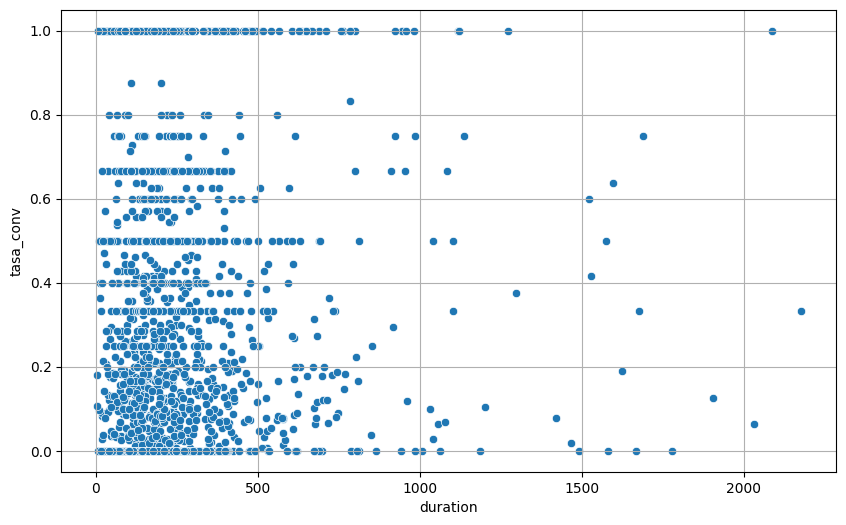

In [1089]:
grupo_=datos_banco.groupby('duration')['y_yes'].mean().rename('tasa_conv').reset_index()
plt.figure(figsize=(10,6))
sns.scatterplot(x=datos_banco['duration'], y='tasa_conv', data=grupo_)
plt.grid()

la tasa de conversion con respecto al tiempo que llevan en el banco, la mayoría de datos se encuentran en el rango de 0 a 500 de duración, vemos que la tasa de conversion esta por debajo del 60%

In [1090]:
print('columnas previas a la modificación \n')

print(columnas_numéricas_nombres)
print(columnas_object_nombres)

columnas_object_nombres=datos_banco.select_dtypes(include=['object']).columns.to_list()
columnas_numéricas_nombres=datos_banco.select_dtypes(exclude=['object','uint8']).columns.to_list()

print('\ncolumnas después de la modificación \n')

print(columnas_numéricas_nombres)
print(columnas_object_nombres)

columnas previas a la modificación 

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

columnas después de la modificación 

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


4.2 veamos las distribuciones de las variables categóricas

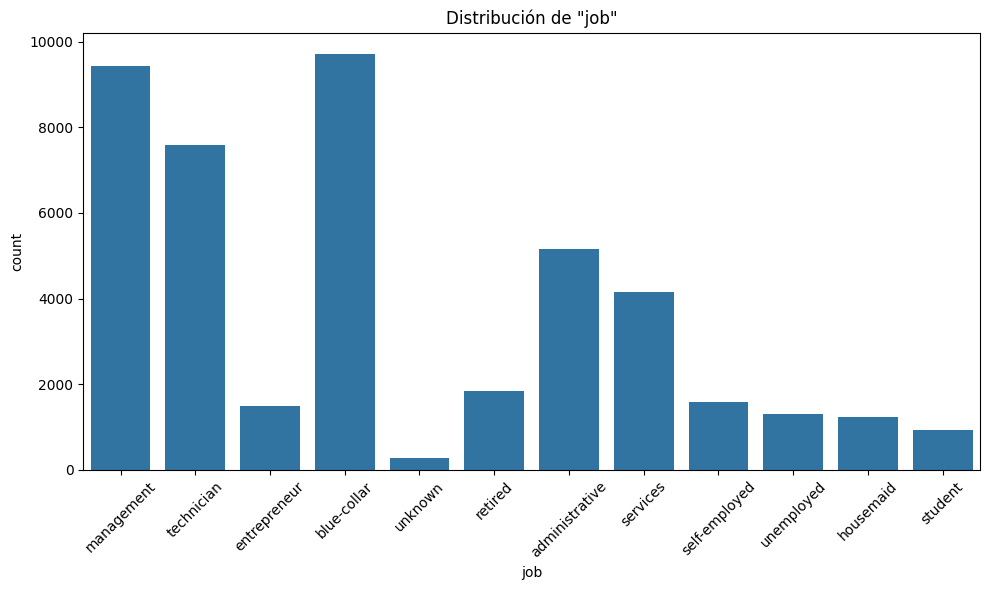

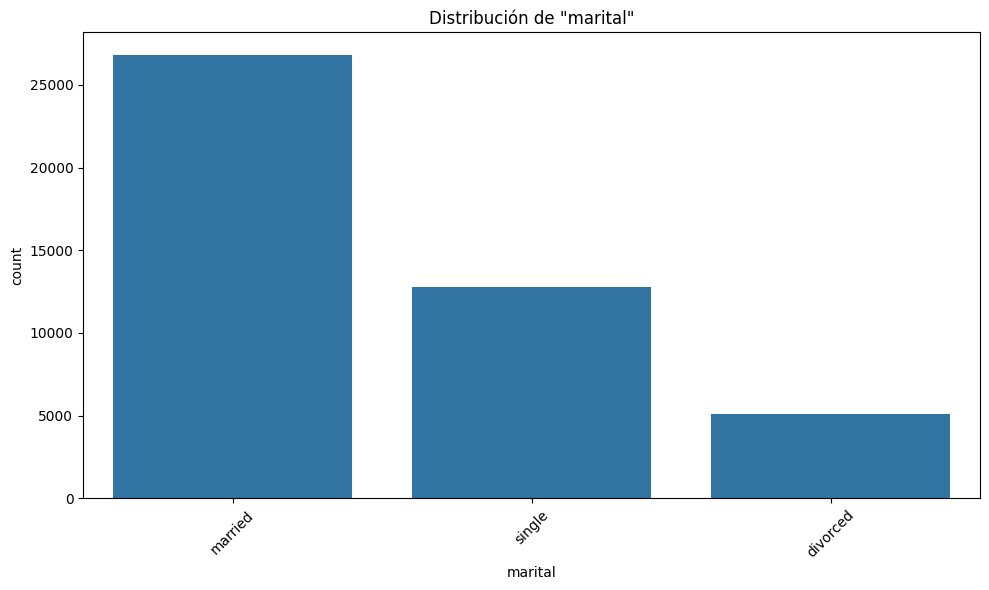

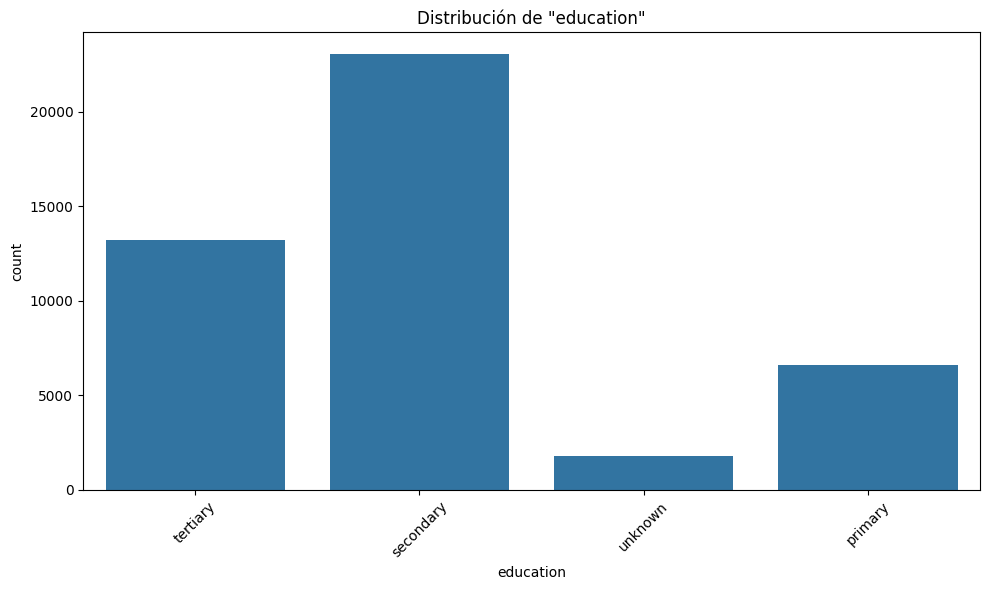

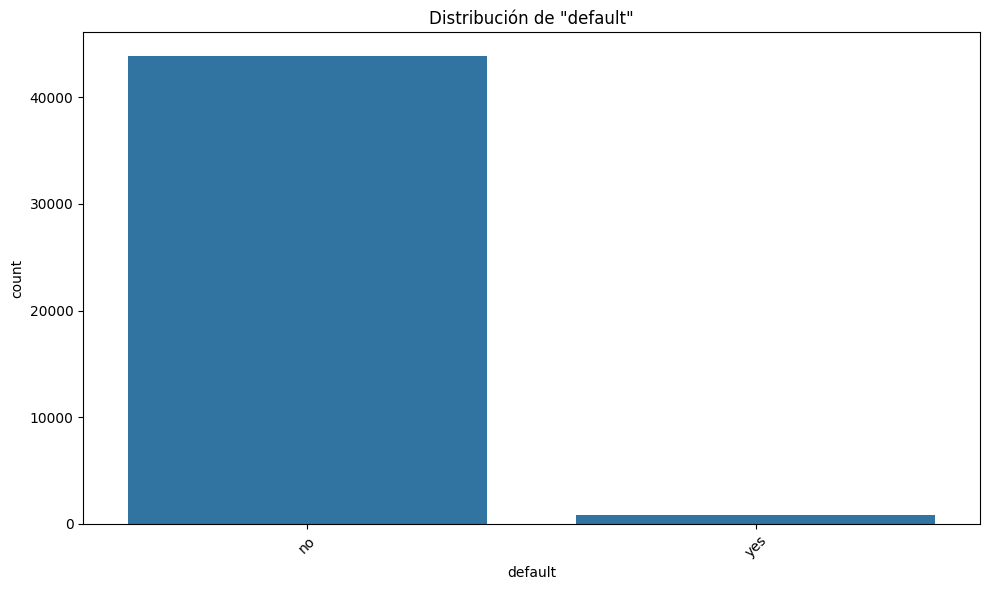

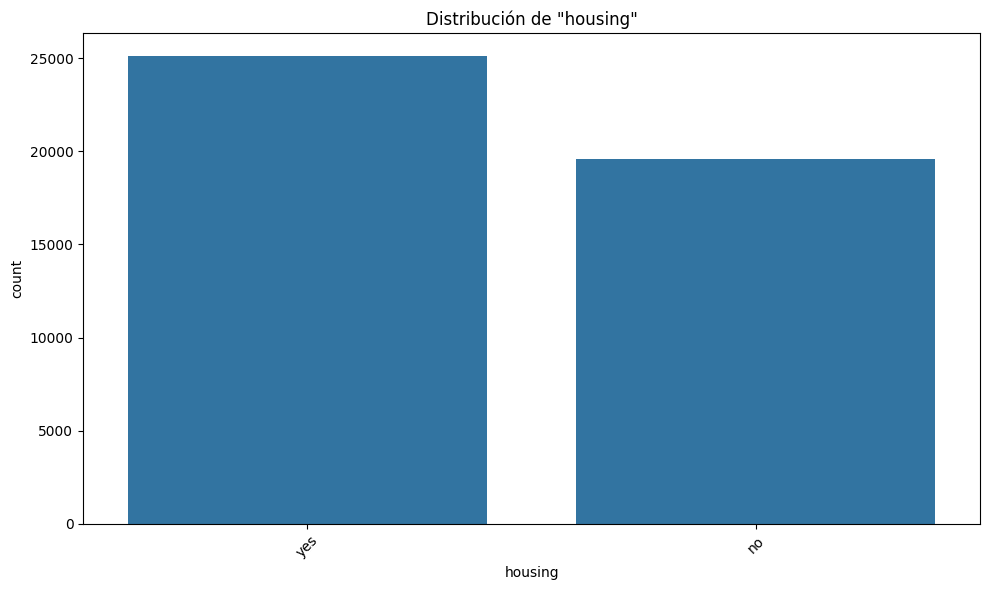

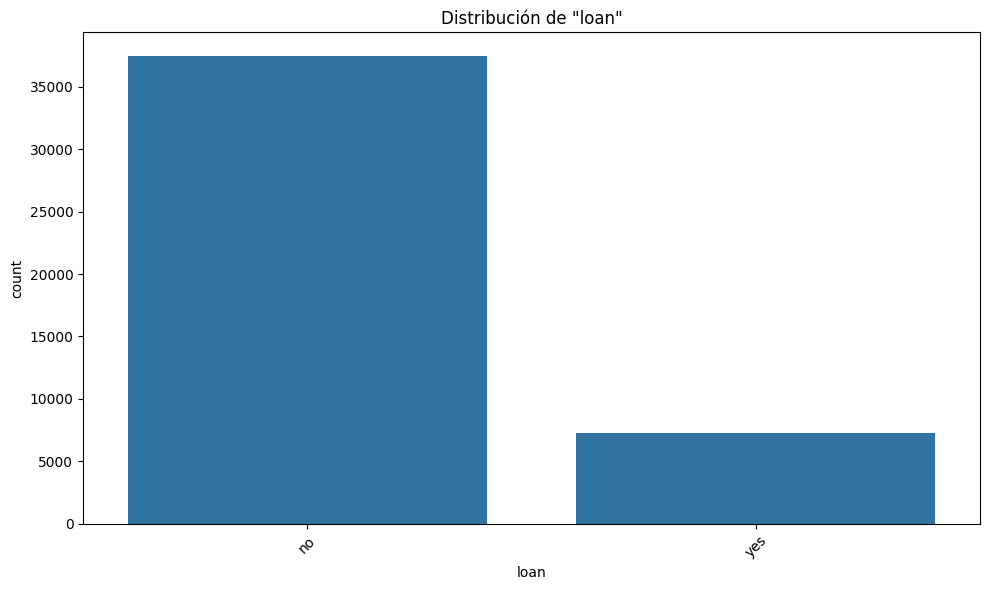

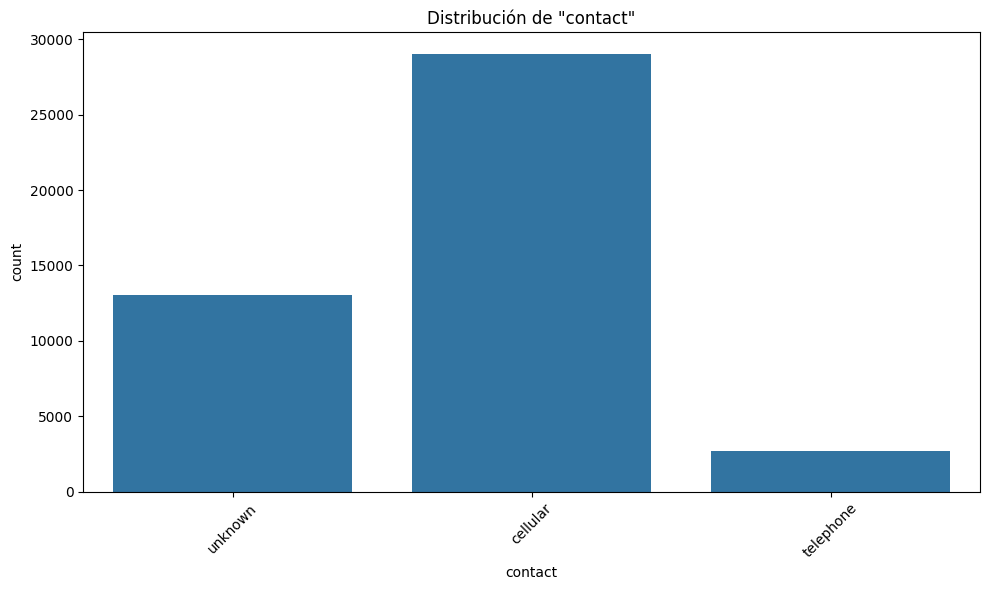

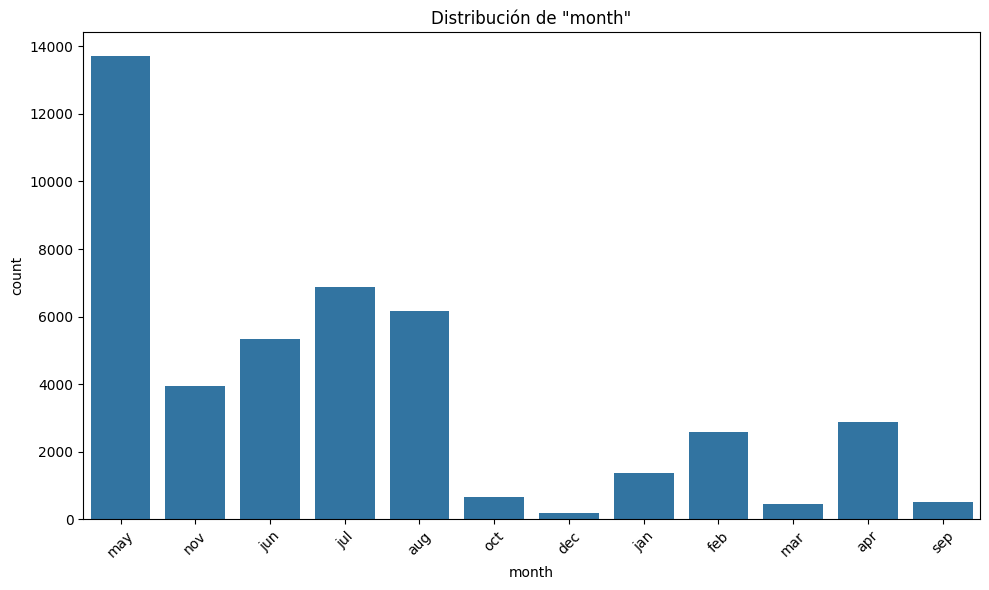

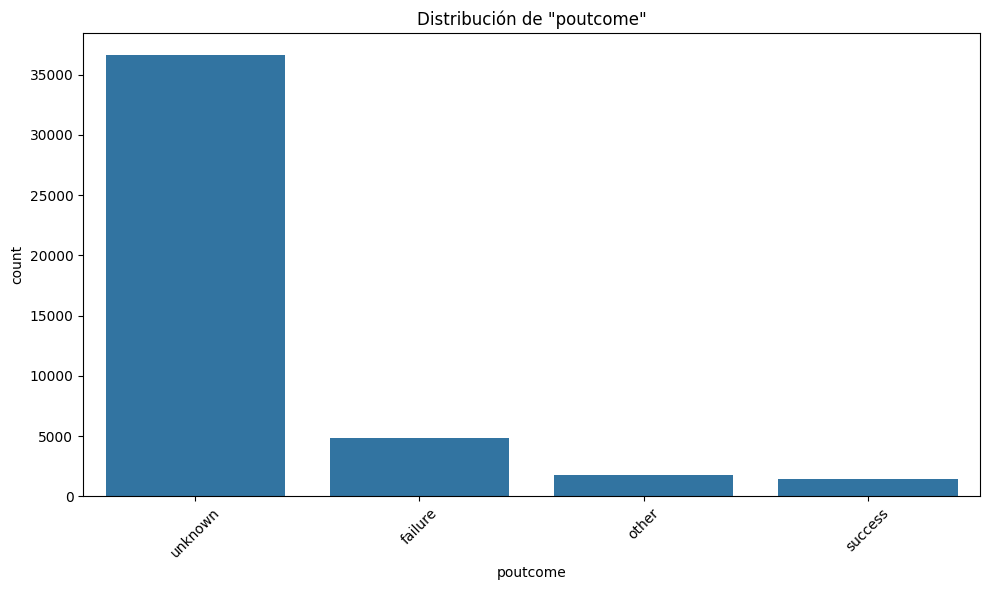

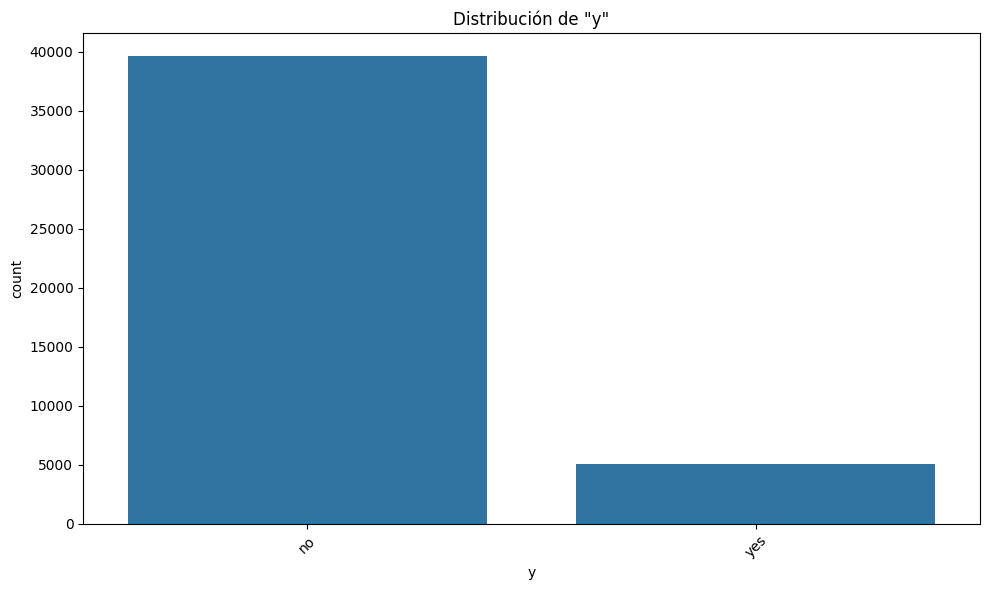

In [1091]:
for var in columnas_object_nombres:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=datos_banco)
    plt.title(f'Distribución de "{var}"')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

veamos la distribución de la variable objetivo en un diagrama de torta

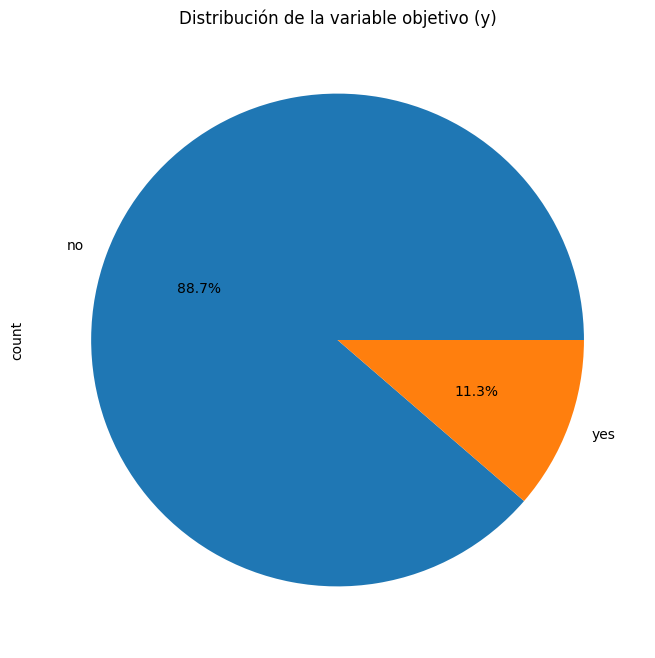

In [1092]:
plt.figure(figsize=(8, 8))
datos_banco['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de la variable objetivo (y)')
plt.show()

veamos los diagramas de caja de las variables numéricas con respecto a la variable objetivo

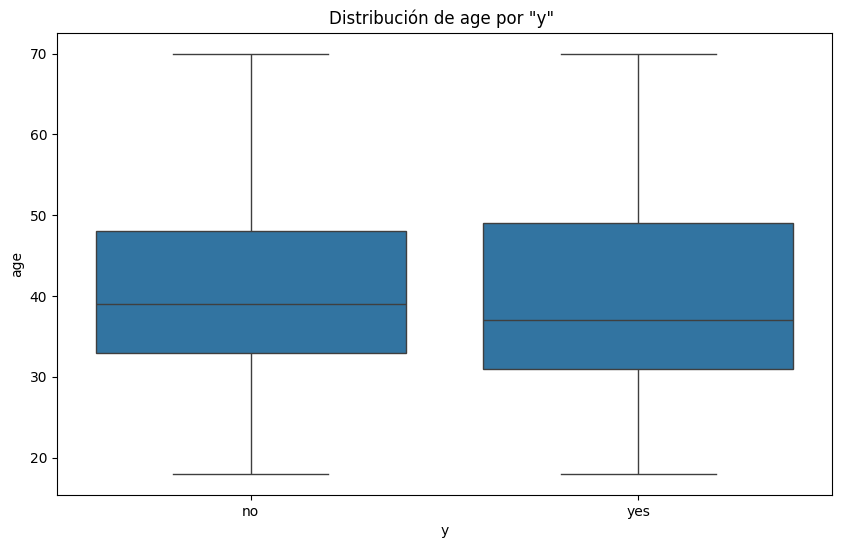

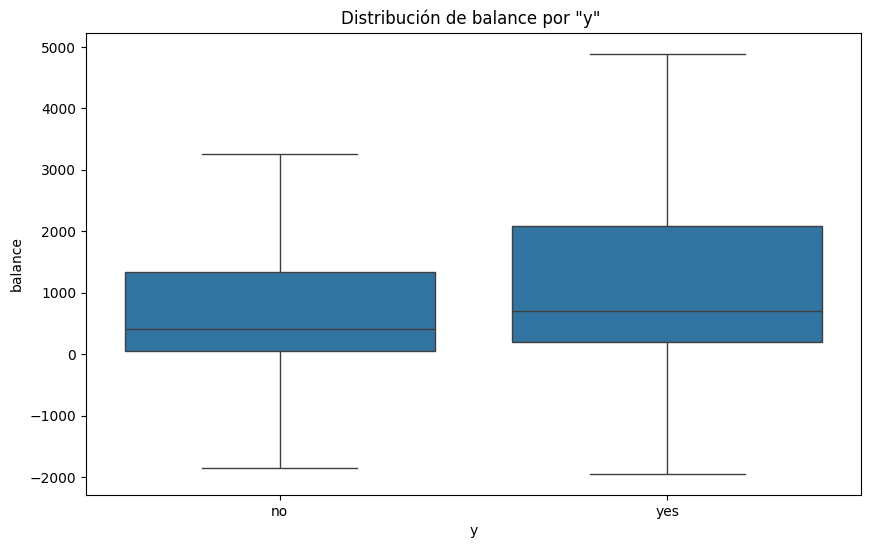

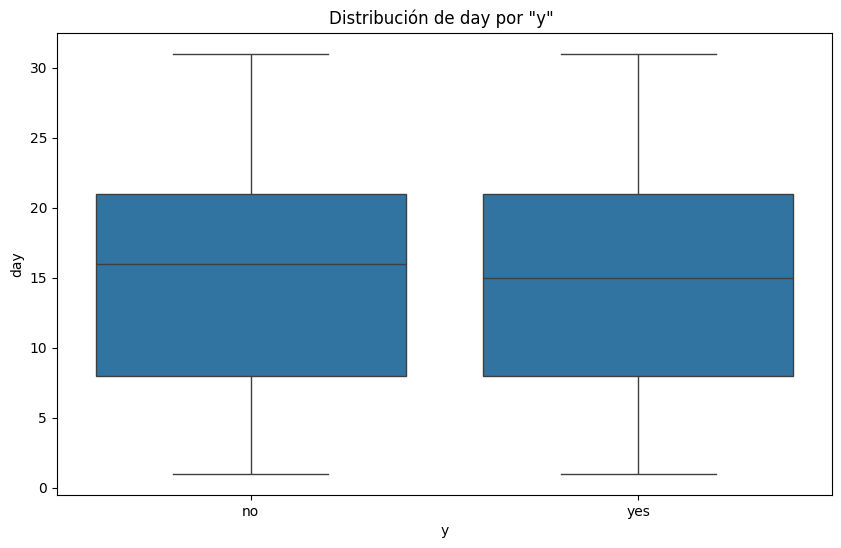

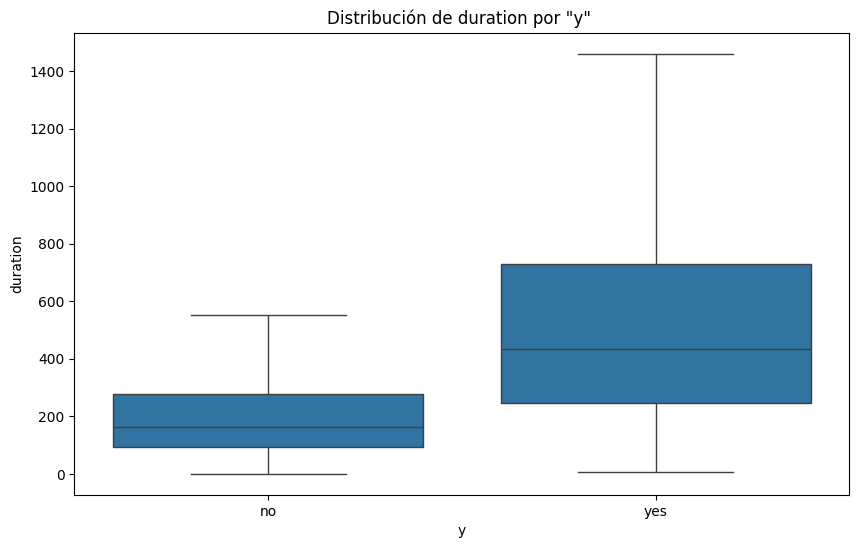

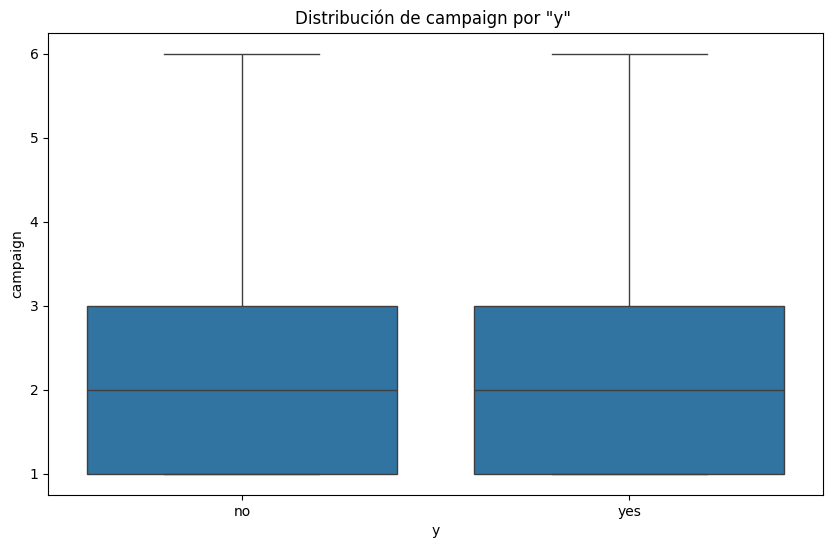

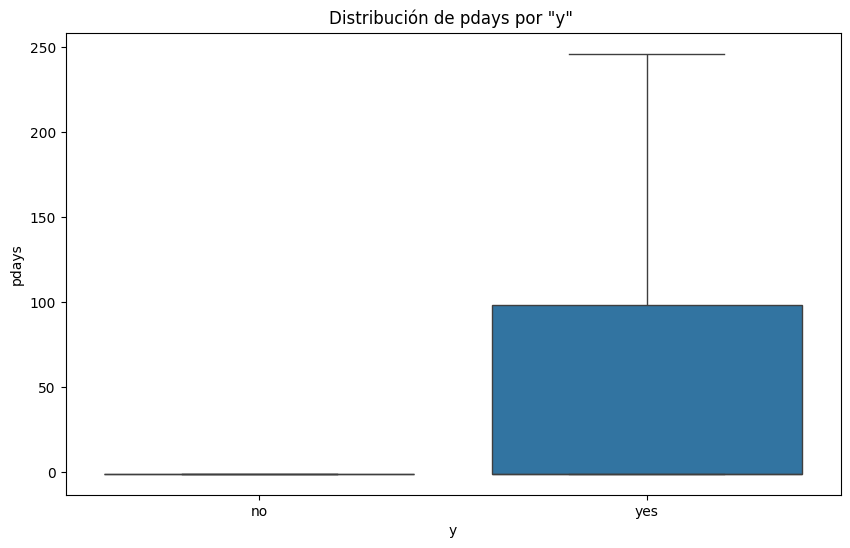

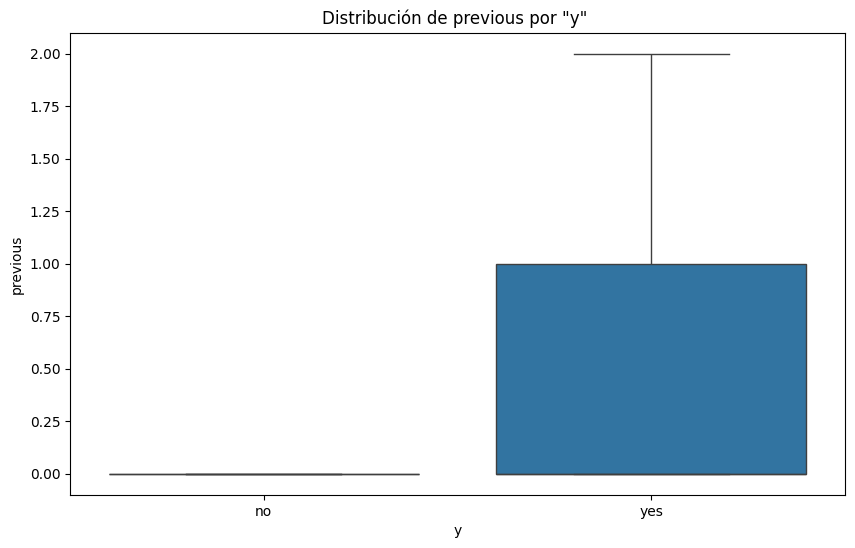

In [1093]:
for var in columnas_numéricas_nombres:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=var, data=datos_banco,showfliers=False)
    plt.title(f'Distribución de {var} por "y" ')
    plt.show()

podemos ver que 

In [1094]:
columnas_numéricas_nuevas=datos_banco.select_dtypes(include=['uint8']).columns.to_list()
columnas_numéricas_totales=datos_banco.select_dtypes(exclude=['object']).columns.to_list()


4.3 vamos a ver la correlación de todas las variables "numéricas" con el fin de identificar que columnas están coo relacionadas, para este caso hay que ser avil ya que no separe las columnas con datos repetidos

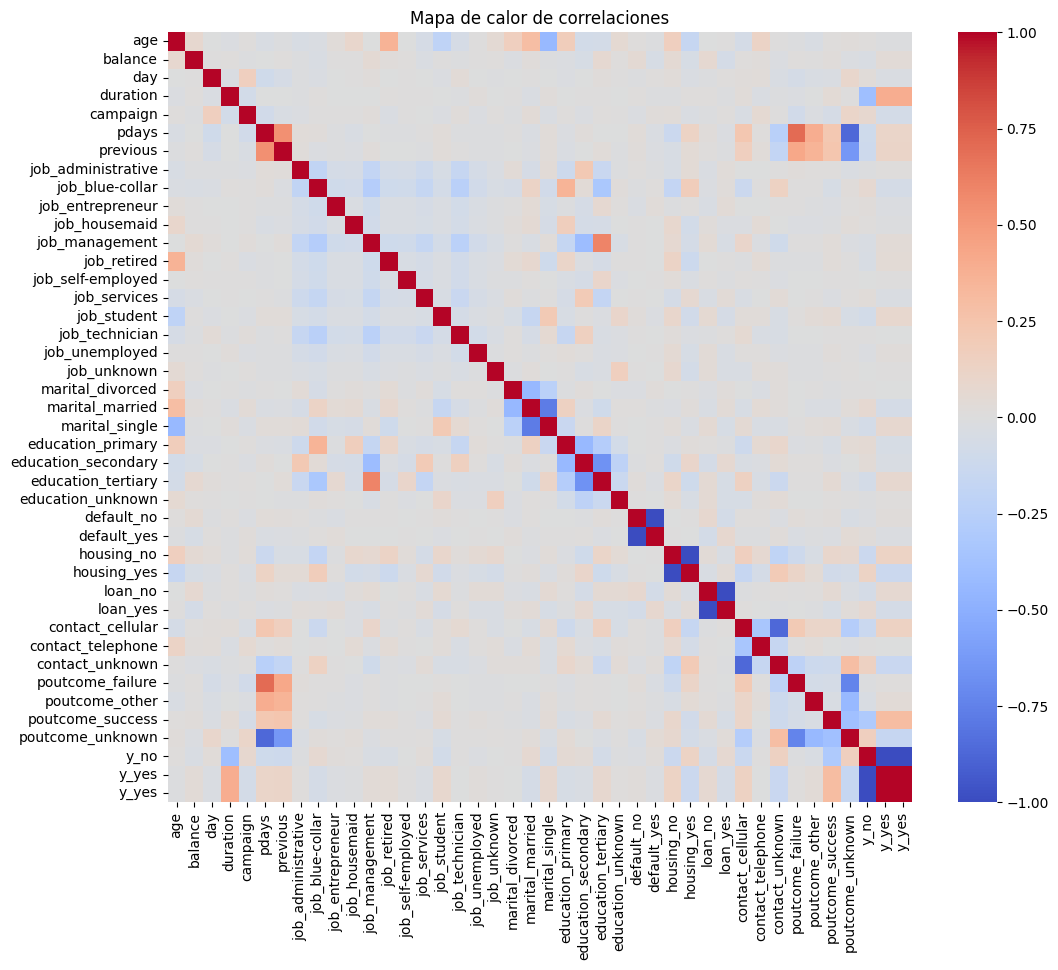

In [1095]:
plt.figure(figsize=(12, 10))
sns.heatmap(datos_banco[columnas_numéricas_totales + ['y_yes']].corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [1096]:
datos_banco_numeric=datos_banco.select_dtypes(include=['float64','int64','int32','uint8'])
correlaciones_=datos_banco_numeric.corr()['y_yes']
correlaciones_significativas = correlaciones_[abs(correlaciones_) > 0.1].sort_values(ascending=False)

print(f"{'Variable':<20} {'Correlación':<13} {'Relación':<25}")
for columna, valor in correlaciones_significativas.items():
    relación = "Directamente proporcional" if valor > 0 else "Inversamente proporcional"
    print(f"{columna:<20} {valor:.2f}       {relación:<25}")

Variable             Correlación   Relación                 
y_yes                1.00       Directamente proporcional
duration             0.40       Directamente proporcional
poutcome_success     0.30       Directamente proporcional
contact_cellular     0.14       Directamente proporcional
housing_no           0.13       Directamente proporcional
previous             0.11       Directamente proporcional
pdays                0.10       Directamente proporcional
housing_yes          -0.13       Inversamente proporcional
contact_unknown      -0.15       Inversamente proporcional
poutcome_unknown     -0.16       Inversamente proporcional
y_no                 -1.00       Inversamente proporcional


ya con la info previa se puede ver de forma mas clara, la mayoría de proporcionalidades están debajo del 0.5 siendo leves o muy leves

C:\Users\User\AppData\Local\Temp\ipykernel_32\1574048121.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datos_banco.groupby('month')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)


<Figure size 1200x600 with 0 Axes>

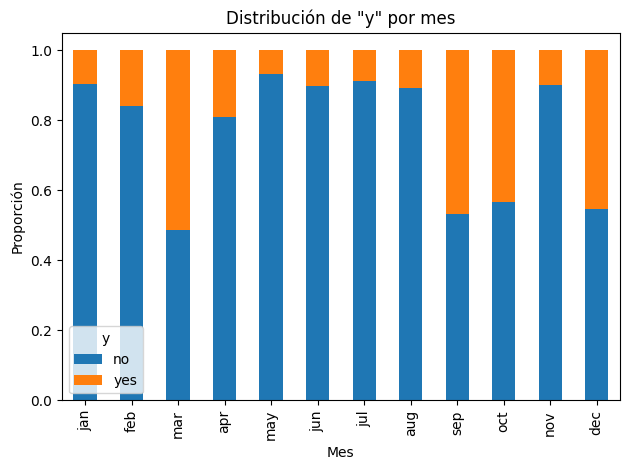

In [1097]:
# Definir el orden de los meses
orden_meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convertir la columna 'month' a una categoría ordenada
datos_banco['month'] = pd.Categorical(datos_banco['month'], categories=orden_meses, ordered=True)

# Luego, grafica con los meses en el orden correcto
plt.figure(figsize=(12, 6))
datos_banco.groupby('month')['y'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Distribución de "y" por mes')
plt.xlabel('Mes')
plt.ylabel('Proporción')
plt.legend(title='y')
plt.tight_layout()
plt.show()

las tendencias temporales de personas que responden positivamente al ingreso con respecto al mes es para los meses de marzo, septiembre y octubre

veamos mas de cerca las variables que denotaron una proporcionalidad

veamos el caso de la duración de la llamada

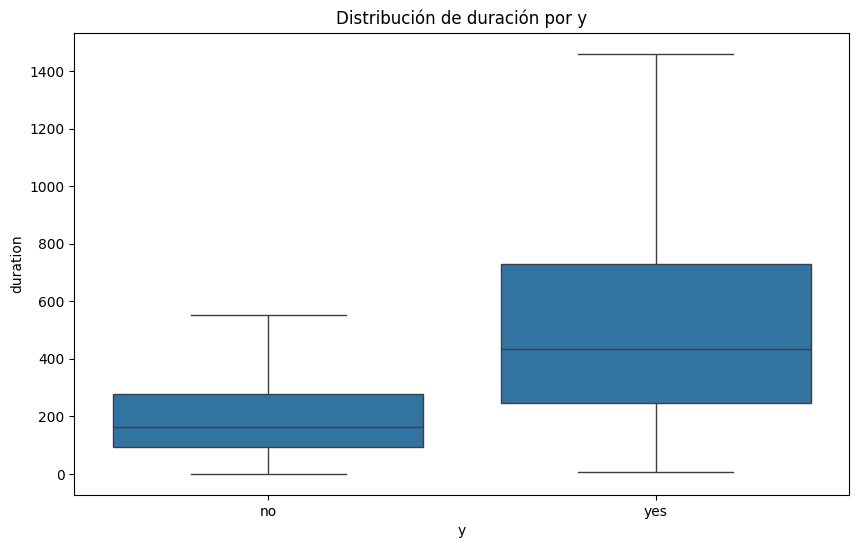

In [1098]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=datos_banco,showfliers=False)#el showfliers es para no ver datos atípicos
plt.title('Distribución de duración por y')
plt.show()

veamos el caso de "poutcome_success" 

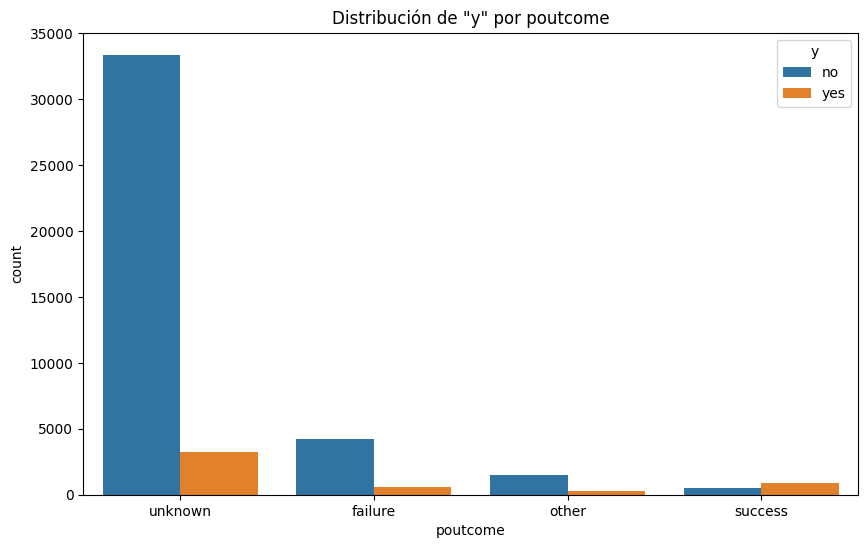

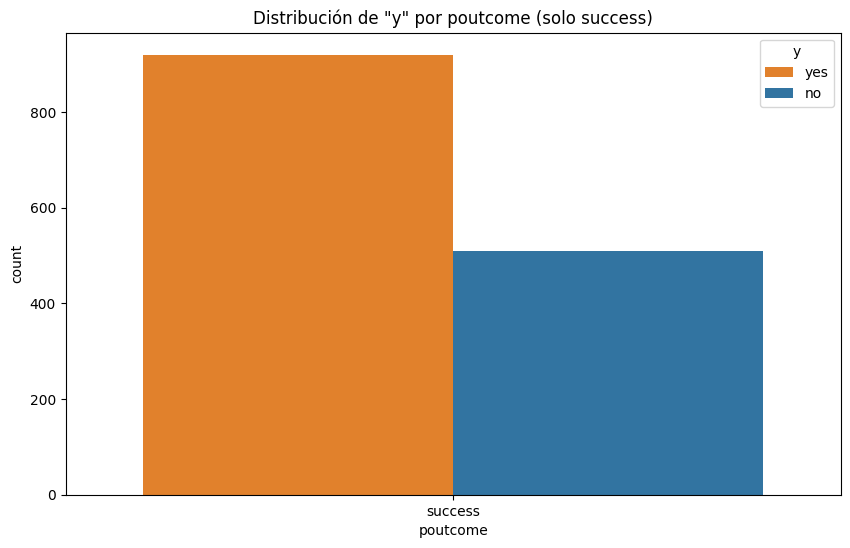

In [1099]:
datos_filtrados_poutcome = datos_banco[datos_banco['poutcome'] == 'success']

plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=datos_banco)#seleccione los colores acorde a las gráficas previas
plt.title('Distribución de "y" por poutcome')
plt.legend(title='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=datos_filtrados_poutcome,palette={'yes': '#ff7f0e', 'no': '#1f77b4'})#seleccione los colores acorde a las gráficas previas
plt.title('Distribución de "y" por poutcome (solo success)')
plt.legend(title='y')
plt.show()

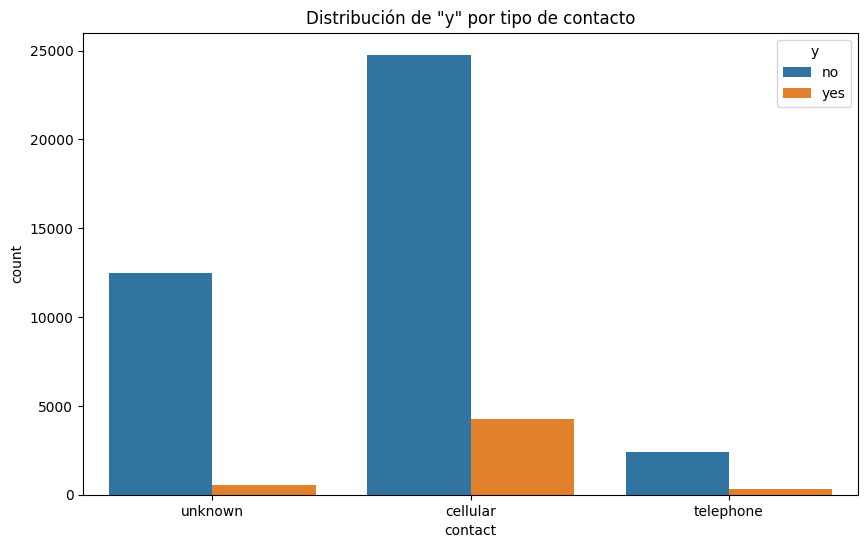

In [1100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='contact', hue='y', data=datos_banco)#seleccione los colores acorde a las gráficas previas
plt.title('Distribución de "y" por tipo de contacto')
plt.legend(title='y')
plt.show()

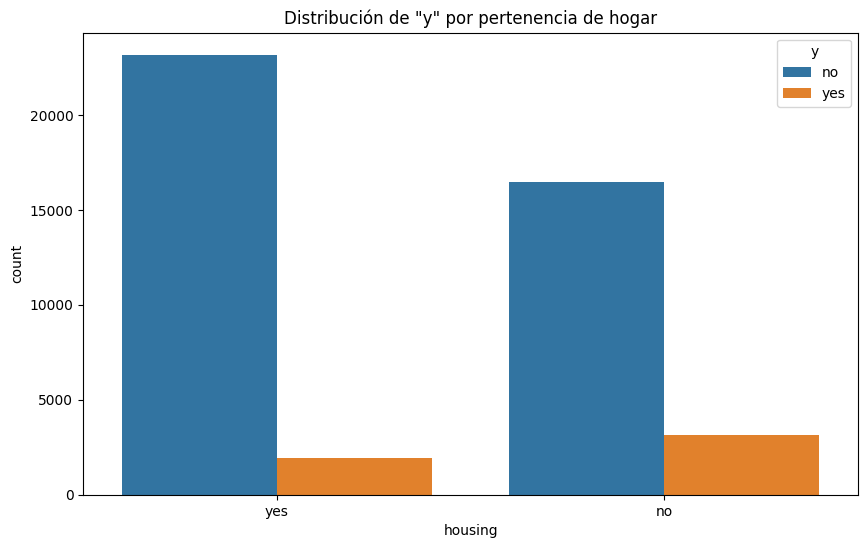

In [1101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', hue='y', data=datos_banco)#seleccione los colores acorde a las gráficas previas
plt.title('Distribución de "y" por pertenencia de hogar')
plt.legend(title='y')
plt.show()

In [1102]:
print(datos_banco['previous'].describe())

count    44703.000000
mean         0.567188
std          1.899869
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_32\2610920990.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='y')


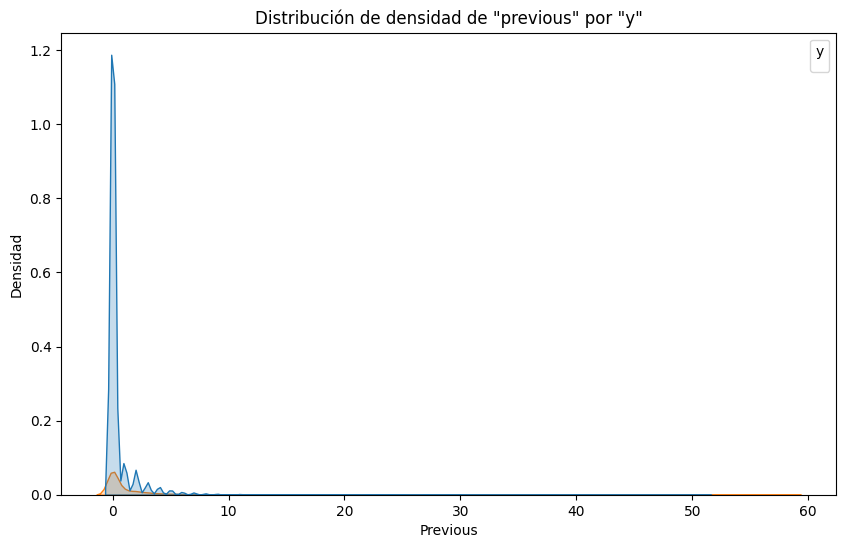

In [1103]:
# Filtrar los datos para incluir solo los valores mayores a 0 en 'previous'
datos_filtrados_previous = datos_banco[datos_banco['previous'] > 0]

# Crear el KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x='previous', hue='y', data=datos_banco, fill=True)
plt.title('Distribución de densidad de "previous" por "y"')
plt.xlabel('Previous')
plt.ylabel('Densidad')
plt.legend(title='y')
plt.show()


ya por ultimo miremos otras variables que podrían indicarnos mas cosas relevantes

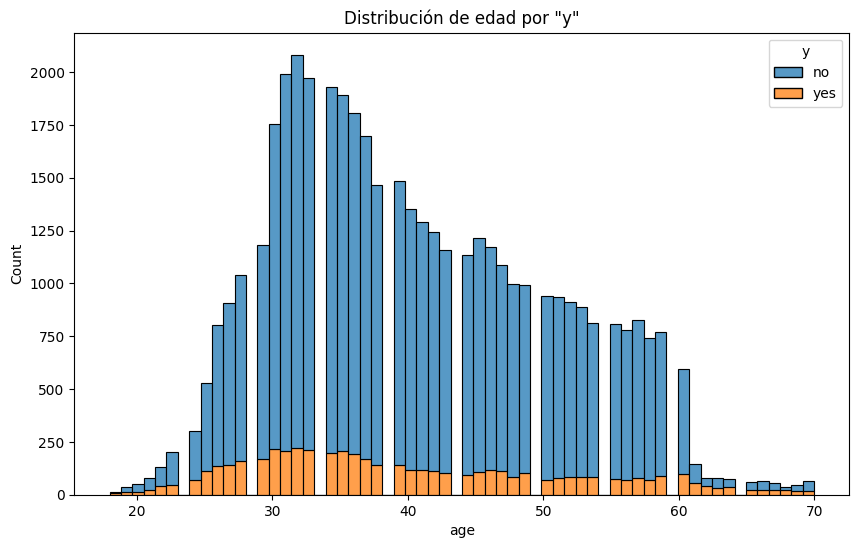

In [1104]:
plt.figure(figsize=(10, 6))
sns.histplot(data=datos_banco, x='age', hue='y', multiple='stack')
plt.title('Distribución de edad por "y"')
plt.show()

ojo aca vamos a ver los diagramas de caja del balance , tanto los sin los datos atípicos como el que si los tiene, vemos que independiente de las deudas los balances positivos también están con los "y" positivos

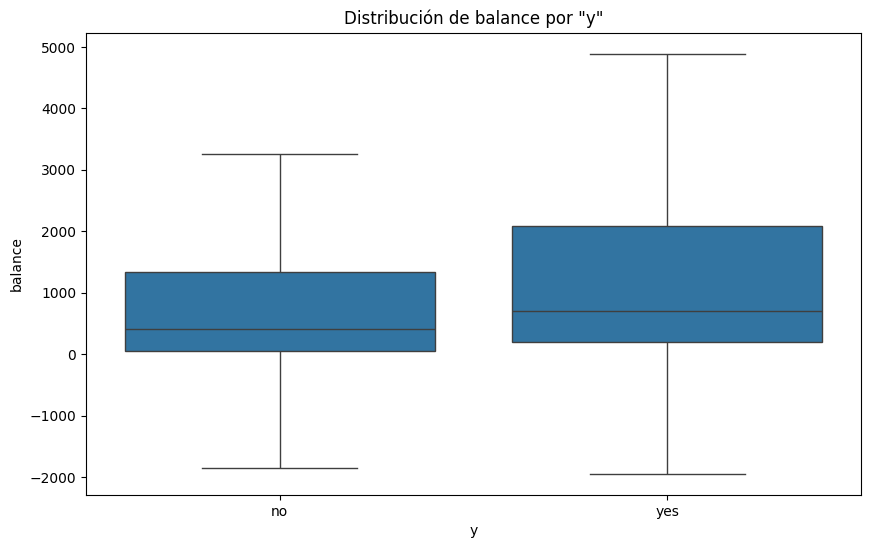

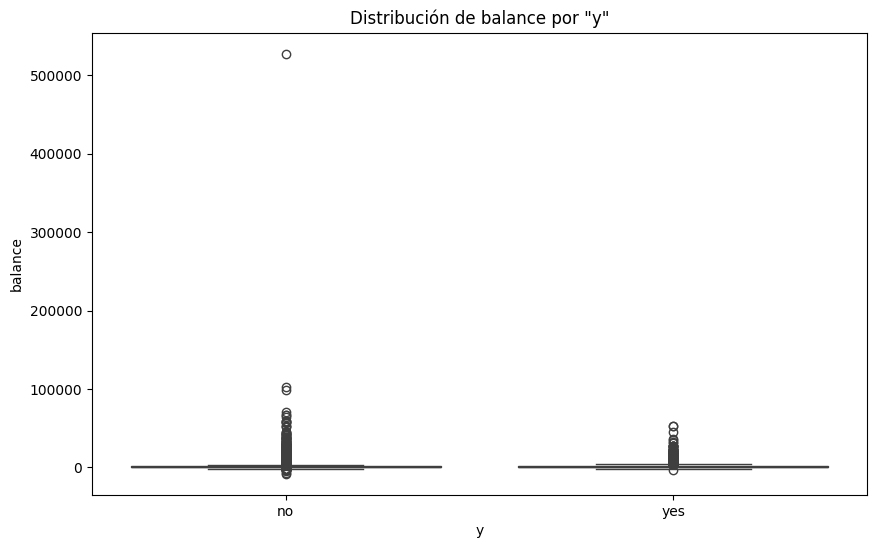

In [1105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=datos_banco,showfliers=False)
plt.title('Distribución de balance por "y"')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=datos_banco)
plt.title('Distribución de balance por "y"')
plt.show()

vemos la tasa de conversion con respecto al empleo de la persona

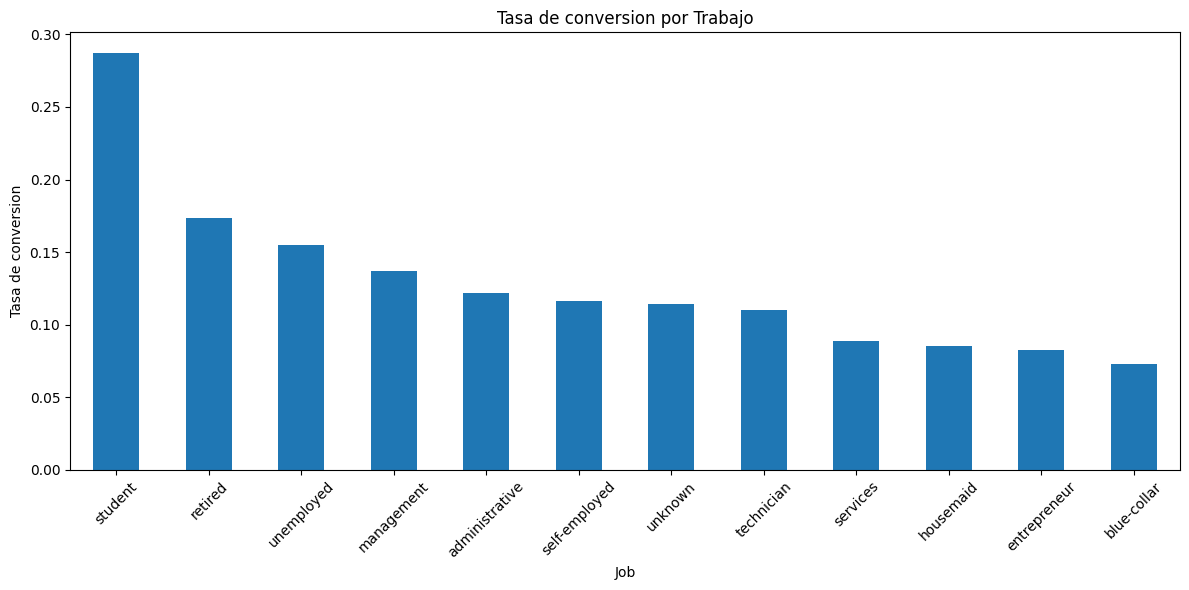

In [1106]:
job_success_rate = datos_banco.groupby('job')['y_yes'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
job_success_rate.plot(kind='bar')
plt.title('Tasa de conversion por Trabajo')
plt.xlabel('Job')
plt.ylabel('Tasa de conversion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Interpretación de resultados

5.1 Resumen de hallazgos clave

## Factores con Mayor Influencia Positiva

5.1.1 Duración de la interacción (correlación: 0.396362)

La duración es el factor más influyente para un resultado positivo.


5.1.2 Éxito en contactos previos (correlación: 0.303881)

Clientes con experiencias previas exitosas son más propensos a responder positivamente.


5.1.3 Método de contacto: celular (correlación: 0.140453)

El contacto por celular es más efectivo que otros métodos.


5.1.4 Situación de vivienda: sin vivienda (correlación: 0.131171)

Clientes sin vivienda muestran una tendencia más positiva.



## Factores Demográficos y Ocupacionales

5.1.5 Educación terciaria (correlación: 0.071173)

Clientes con educación superior tienden a responder más positivamente.


5.1.6 Estado civil: soltero (correlación: 0.071831)

Los solteros muestran una ligera tendencia positiva.


5.1.7 Ocupación: estudiantes y jubilados (correlaciones: 0.080172 y 0.039360)

Estos grupos ocupacionales tienden a ser más receptivos.



## Factores Financieros

5.1.8 Sin préstamos (correlación: 0.064659)

Clientes sin préstamos tienden a responder más positivamente.


5.1.9 Balance positivo (correlación: 0.034935)

Existe una débil correlación positiva con el balance de la cuenta.



## Factores de Campaña

5.1.10 Intensidad de la campaña (correlación: -0.071603)

Un mayor número de contactos en la campaña tiene un efecto ligeramente negativo.



## Factores con Influencia Negativa

5.1.11 Método de contacto desconocido (correlación: -0.146950)

Métodos de contacto no especificados tienen un impacto negativo.


5.1.12 Resultado previo desconocido (correlación: -0.163978)

La falta de información sobre interacciones previas está asociada con respuestas negativas.





5.2. Respuesta a las preguntas de investigación

a la pregunta **¿Qué perfil tienen los clientes con mayor potencial de conversión?** podemos responder: 
5.2.1. Historial de interacciones:
   - Han tenido experiencias exitosas en contactos previos con la empresa
   - Típicamente tienen interacciones de mayor duración

5.2.2. Método de contacto:
   - Responden mejor cuando se les contacta por teléfono celular

5.2.3. Situación de vivienda:
   - Sorprendentemente, aquellos sin vivienda propia muestran una tendencia más positiva

5.2.4. Perfil educativo y ocupacional:
   - Tienen educación terciaria o superior
   - Son estudiantes o jubilados

5.2.5. Estado civil:
   - Tienden a ser solteros

5.2.6. Situación financiera:
   - No tienen préstamos activos
   - Mantienen un balance positivo en su cuenta

5.2.7. Respuesta a campañas:
   - Responden mejor a campañas con menos contacto repetidos

Consideraciones adicionales:
- La edad tiene una influencia mínima, con una ligera tendencia hacia clientes más jóvenes
- Los clientes sin información previa o con métodos de contacto desconocidos tienden a tener menor potencial de conversión

